# PCA and autoencoders

此份 Notebook 主要是參考 李弘毅的 PCA&AutoEncoder 教學影片
連結如下
http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/PCA.mp4

In [1]:
# Numpy is our primary dependency
import numpy as np

# Import datasets from scikit-learn only to get the iris data set
from sklearn import datasets

# We will need some plotting too
import matplotlib.pyplot as plt


# import seaborn
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

#假設你要讓每一個 chart inline 獨立顯示
%matplotlib inline 

## The Dataset

我們使用 MMinst DataSet 作為練習的資料來洚

### Pre-processing of data

In [2]:
from sklearn import datasets
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np


mnist = datasets.load_digits()
X = mnist.data
y = mnist.target

We will need to pre-process the data in various ways. For PCA, we will need all features to be centered (i.e. with mean zero) and with unit standard deviation.

For the autoencoding section, we will need to make sure that all values are between 0 and 1. We will need these data in transposed form as well.

In [3]:
# 他是一個 28*28 影像矩陣
X[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

這個數字 #5#


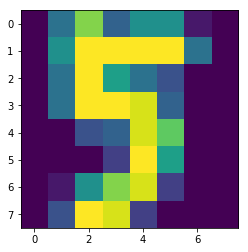

In [4]:
print("這個數字 #{}#".format(y[33]))
plt.imshow(X[33].reshape(8,8), interpolation='nearest')
plt.show()

## PCA 核心研究算法
* 因為是要進行 Feature Dimession Reduction，所以先計算各feature間 distribution 的covariance，故先產出 covariance matrix
* 接下對 cov matrix ，求出 eigen_value 及 eigen_vector
* 再來看 eigen_value 遞減佔比


In [5]:
mean = np.mean(X,axis=0)
x_x = X-mean

In [6]:
cov = np.matmul(x_x.transpose(),x_x)/mean.shape[0]

In [7]:
value,vec = np.linalg.eig(cov)

In [8]:
value.shape

(64,)

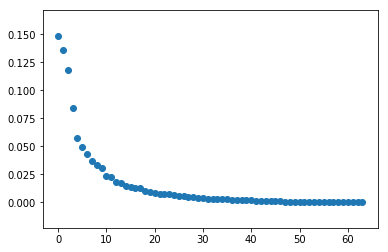

In [9]:
# 再來看 eigen_value 遞減佔比

y_eigen_value = []
for i in range(8*8):
    y_eigen_value.append(value[i]/np.sum(value))

plt.scatter(range(0,8*8), y_eigen_value , cmap=plt.cm.spectral)
plt.show()

In [10]:
# 因為 PCA 產出的值為負到正的浮點數，故需先作平移，才能視覺化成現
new_vec = ((vec+1)*128).astype(int)

In [11]:
# 來看一下 componet

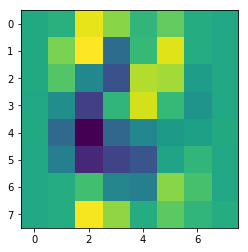

In [12]:
plt.imshow(new_vec[:,0].reshape(8,8), interpolation='nearest')

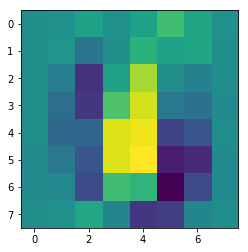

In [13]:
plt.imshow(new_vec[:,1].reshape(8,8), interpolation='nearest')

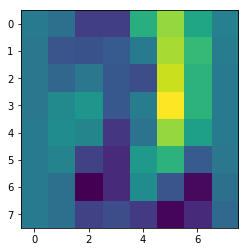

In [14]:
plt.imshow(new_vec[:,2].reshape(8,8), interpolation='nearest')

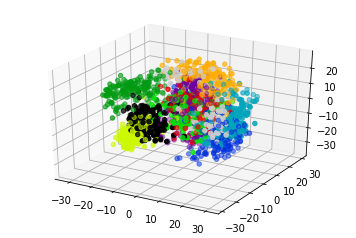

In [15]:
# new_X 為降為過後
new_X = np.matmul(X,vec[:,:3])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_X[:, 2], c=y, cmap=plt.cm.spectral)
plt.show()

In [16]:
# 將投影的結果，進行 Normalize ，以便好計算兩
from sklearn.preprocessing import normalize
new_X_normlized = normalize(new_X)

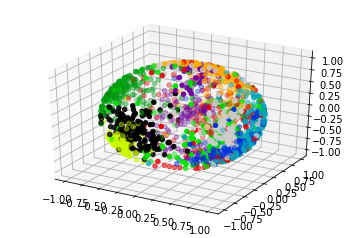

In [17]:
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')
ax2.scatter(new_X_normlized[:, 0], new_X_normlized[:, 1], new_X_normlized[:, 2], c=y, cmap=plt.cm.spectral)
plt.show()

這個數字 #2#


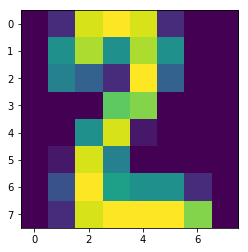

這個數字 #2#


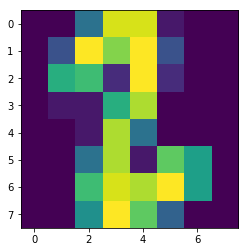

這個數字 #2#


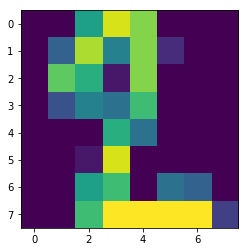

這個數字 #2#


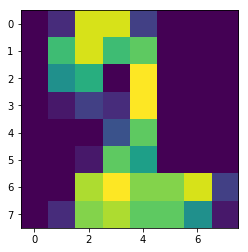

這個數字 #2#


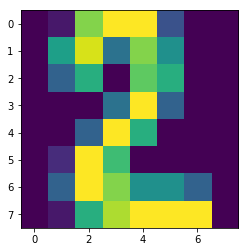

這個數字 #2#


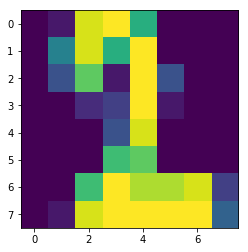

這個數字 #2#


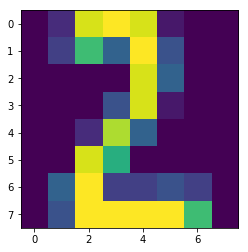

這個數字 #2#


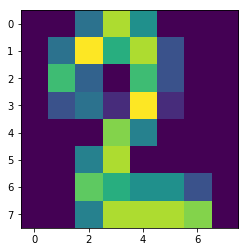

這個數字 #8#


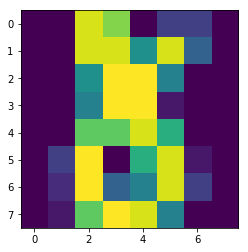

這個數字 #2#


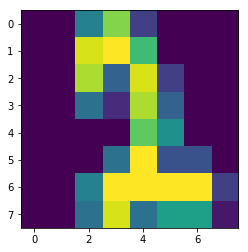

這個數字 #2#


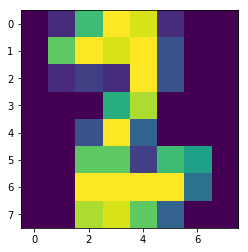

這個數字 #8#


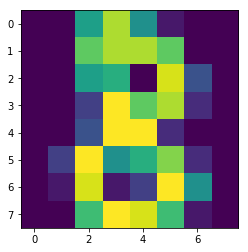

這個數字 #8#


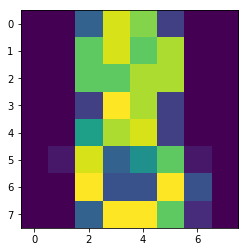

這個數字 #8#


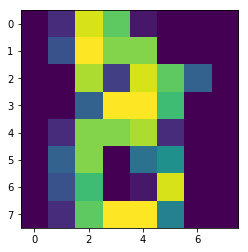

這個數字 #2#


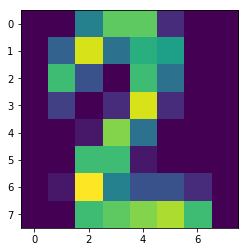

這個數字 #2#


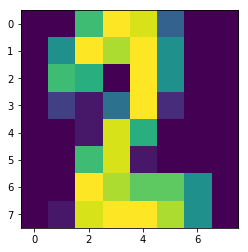

這個數字 #2#


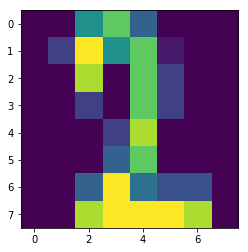

這個數字 #2#


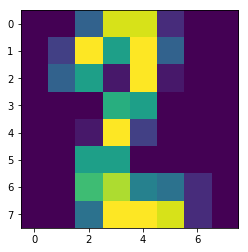

這個數字 #2#


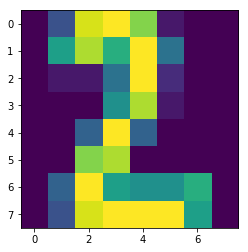

這個數字 #1#


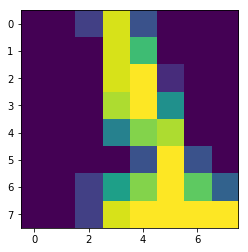

這個數字 #8#


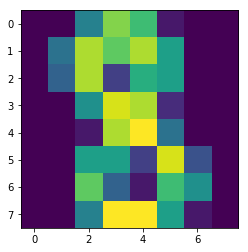

這個數字 #2#


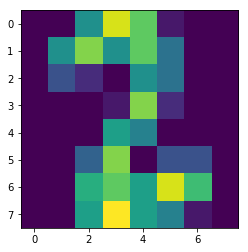

這個數字 #2#


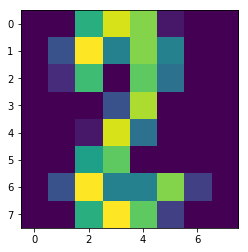

這個數字 #2#


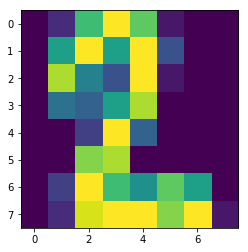

這個數字 #2#


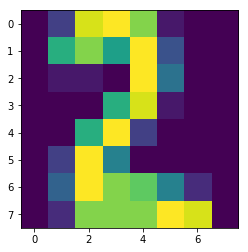

這個數字 #3#


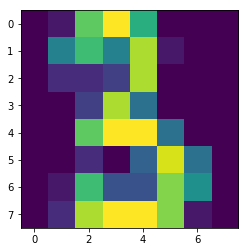

這個數字 #2#


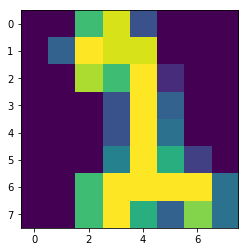

這個數字 #2#


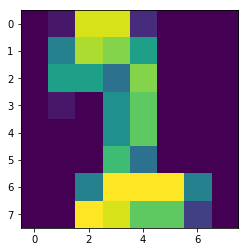

這個數字 #2#


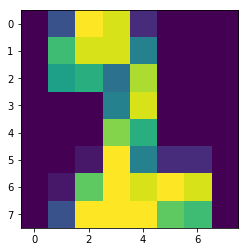

這個數字 #2#


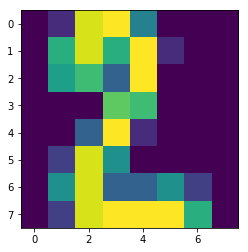

In [18]:
# 計算看看 similarity

test_index = 333
new_X_normlized

sims = np.matmul(new_X_normlized,new_X_normlized[test_index])

for i in sims.argsort()[-30:][::-1]:
    print("這個數字 #{}#".format(y[i]))
    plt.imshow(X[i].reshape(8,8), interpolation='nearest')
    plt.show()



## 使用現成的套件看看跟我自已算的是否有一樣

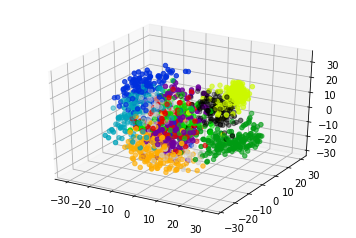

In [19]:
pca = decomposition.PCA(n_components=3)
new_X = pca.fit_transform(X)

fig3 = plt.figure()
ax = fig3.gca(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_X[:, 2], c=y, cmap=plt.cm.spectral)
plt.show()

## Autoencoders by Keras

In [19]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

Using TensorFlow backend.


In [20]:
h1_size = 32
h2_size = 32
input_img = Input(shape=(28*28,))
encoder = Dense(h1_size,activation='relu')(input_img)

hidden = Dense(h2_size,activation='relu')(encoder)

decoder = Dense(28*28,activation='relu')(hidden)
autoencoder = Model(input_img, decoder)


autoencoder.compile(loss='binary_crossentropy',optimizer='adadelta')

## load data

In [21]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [22]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## training 

In [23]:
encoder_model = Model(input_img,encoder)
decoder_model = Model(input_img,decoder)

In [24]:

autoencoder.fit(x_train, x_train,
                epochs=500,
                verbose=2,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
3s - loss: 0.5457 - val_loss: 0.4528
Epoch 2/500
3s - loss: 0.4387 - val_loss: 0.4173
Epoch 3/500
3s - loss: 0.4057 - val_loss: 0.3905
Epoch 4/500
3s - loss: 0.3739 - val_loss: 0.3676
Epoch 5/500
3s - loss: 0.3619 - val_loss: 0.3573
Epoch 6/500
3s - loss: 0.3514 - val_loss: 0.3483
Epoch 7/500
3s - loss: 0.3454 - val_loss: 0.3441
Epoch 8/500
3s - loss: 0.3381 - val_loss: 0.3344
Epoch 9/500
3s - loss: 0.3280 - val_loss: 0.3250
Epoch 10/500
3s - loss: 0.3224 - val_loss: 0.3221
Epoch 11/500
3s - loss: 0.3198 - val_loss: 0.3199
Epoch 12/500
3s - loss: 0.3177 - val_loss: 0.3179
Epoch 13/500
3s - loss: 0.3156 - val_loss: 0.3159
Epoch 14/500
3s - loss: 0.3122 - val_loss: 0.3087
Epoch 15/500
3s - loss: 0.3070 - val_loss: 0.3076
Epoch 16/500
3s - loss: 0.3056 - val_loss: 0.3059
Epoch 17/500
3s - loss: 0.3044 - val_loss: 0.3049
Epoch 18/500
3s - loss: 0.3033 - val_loss: 0.3043
Epoch 19/500
3s - loss: 0.3025 - val_loss: 0.3031
Epoch 20/

3s - loss: 0.2044 - val_loss: 0.2041
Epoch 164/500
3s - loss: 0.2044 - val_loss: 0.2024
Epoch 165/500
3s - loss: 0.2040 - val_loss: 0.2025
Epoch 166/500
3s - loss: 0.2037 - val_loss: 0.2048
Epoch 167/500
3s - loss: 0.2046 - val_loss: 0.2024
Epoch 168/500
3s - loss: 0.2038 - val_loss: 0.2028
Epoch 169/500
3s - loss: 0.2039 - val_loss: 0.2032
Epoch 170/500
3s - loss: 0.2035 - val_loss: 0.2024
Epoch 171/500
3s - loss: 0.2035 - val_loss: 0.2034
Epoch 172/500
3s - loss: 0.2040 - val_loss: 0.2041
Epoch 173/500
3s - loss: 0.2037 - val_loss: 0.2025
Epoch 174/500
3s - loss: 0.2040 - val_loss: 0.2030
Epoch 175/500
3s - loss: 0.2042 - val_loss: 0.2031
Epoch 176/500
3s - loss: 0.2038 - val_loss: 0.2020
Epoch 177/500
3s - loss: 0.2038 - val_loss: 0.2028
Epoch 178/500
3s - loss: 0.2034 - val_loss: 0.2048
Epoch 179/500
3s - loss: 0.2041 - val_loss: 0.2026
Epoch 180/500
3s - loss: 0.2037 - val_loss: 0.2028
Epoch 181/500
3s - loss: 0.2035 - val_loss: 0.2021
Epoch 182/500
3s - loss: 0.2033 - val_loss: 0

3s - loss: 0.1891 - val_loss: 0.1883
Epoch 325/500
3s - loss: 0.1879 - val_loss: 0.1854
Epoch 326/500
3s - loss: 0.1888 - val_loss: 0.1899
Epoch 327/500
3s - loss: 0.1885 - val_loss: 0.1860
Epoch 328/500
3s - loss: 0.1903 - val_loss: 0.1939
Epoch 329/500
3s - loss: 0.1885 - val_loss: 0.1851
Epoch 330/500
3s - loss: 0.1881 - val_loss: 0.2017
Epoch 331/500
3s - loss: 0.1890 - val_loss: 0.1874
Epoch 332/500
3s - loss: 0.1877 - val_loss: 0.1848
Epoch 333/500
3s - loss: 0.1886 - val_loss: 0.1862
Epoch 334/500
3s - loss: 0.1892 - val_loss: 0.1923
Epoch 335/500
3s - loss: 0.1888 - val_loss: 0.1865
Epoch 336/500
3s - loss: 0.1881 - val_loss: 0.1859
Epoch 337/500
3s - loss: 0.1878 - val_loss: 0.1851
Epoch 338/500
3s - loss: 0.1889 - val_loss: 0.1853
Epoch 339/500
3s - loss: 0.1884 - val_loss: 0.1853
Epoch 340/500
3s - loss: 0.1880 - val_loss: 0.1862
Epoch 341/500
3s - loss: 0.1879 - val_loss: 0.1854
Epoch 342/500
3s - loss: 0.1886 - val_loss: 0.1854
Epoch 343/500
3s - loss: 0.1879 - val_loss: 0

3s - loss: 0.1887 - val_loss: 0.1854
Epoch 486/500
3s - loss: 0.1886 - val_loss: 0.1882
Epoch 487/500
3s - loss: 0.1882 - val_loss: 0.1855
Epoch 488/500
3s - loss: 0.1886 - val_loss: 0.1874
Epoch 489/500
3s - loss: 0.1875 - val_loss: 0.1848
Epoch 490/500
3s - loss: 0.1903 - val_loss: 0.1849
Epoch 491/500
3s - loss: 0.1884 - val_loss: 0.1842
Epoch 492/500
3s - loss: 0.1897 - val_loss: 0.1843
Epoch 493/500
3s - loss: 0.1892 - val_loss: 0.1920
Epoch 494/500
3s - loss: 0.1886 - val_loss: 0.1875
Epoch 495/500
3s - loss: 0.1895 - val_loss: 0.1857
Epoch 496/500
4s - loss: 0.1889 - val_loss: 0.1870
Epoch 497/500
4s - loss: 0.1885 - val_loss: 0.1848
Epoch 498/500
4s - loss: 0.1888 - val_loss: 0.1849
Epoch 499/500
3s - loss: 0.1926 - val_loss: 0.1906
Epoch 500/500
3s - loss: 0.1897 - val_loss: 0.1879


In [25]:
# encode and decode some digits
# note that we take them from the *test* set
# encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder_model.predict(x_test[:100].reshape(100,28*28))

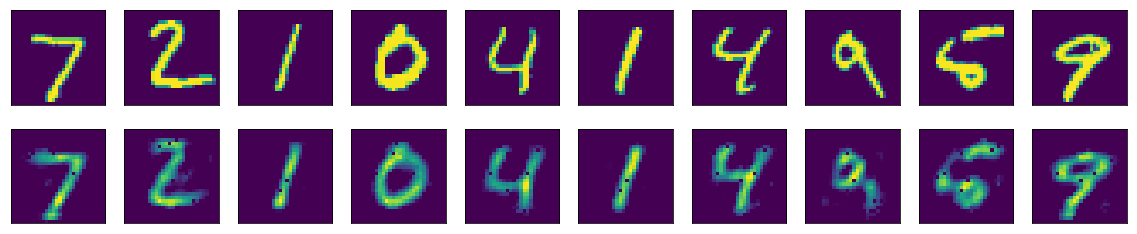

In [26]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow((decoded_imgs[i]).reshape(28, 28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
new_X = encoder_model.predict(x_test.reshape(x_test.shape[0],28*28))

In [28]:
new_X = (new_X*255).astype('int32')

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

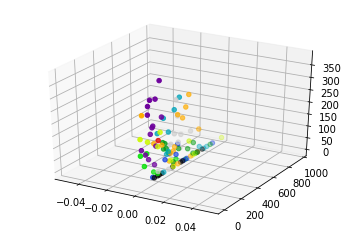

In [132]:


fig3 = plt.figure()
ax = fig3.gca(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_X[:, 2], c=y_test[:100], cmap=plt.cm.spectral)
plt.show()